(<AxesSubplot:>, <AxesSubplot:xlabel='intensity', ylabel='# pixels'>)

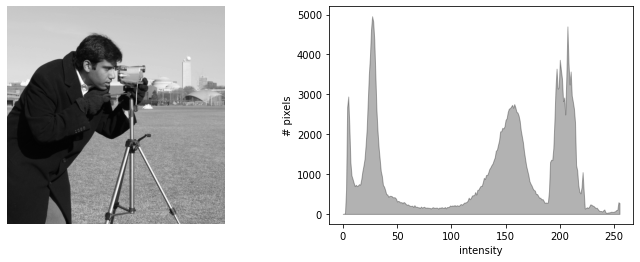

In [1]:
import skdemo
import matplotlib.pyplot as plt
from skimage import data, img_as_float, io

camera = data.camera()
skdemo.imshow_with_histogram(camera)

(<AxesSubplot:>, <AxesSubplot:xlabel='intensity', ylabel='# pixels'>)

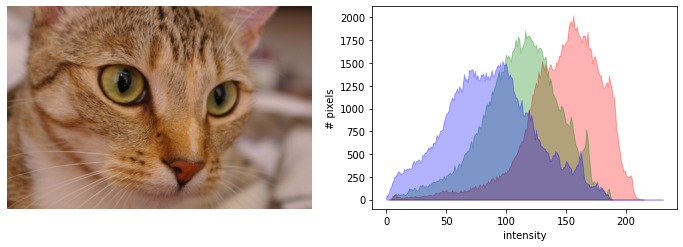

In [2]:
cat = data.chelsea()
skdemo.imshow_with_histogram(cat)

(<AxesSubplot:>, <AxesSubplot:xlabel='intensity', ylabel='# pixels'>)

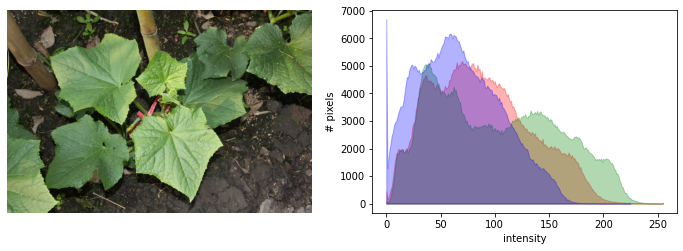

In [3]:
leaves = io.imread('leaves.jpg')
skdemo.imshow_with_histogram(leaves)

(<AxesSubplot:>, <AxesSubplot:xlabel='intensity', ylabel='# pixels'>)

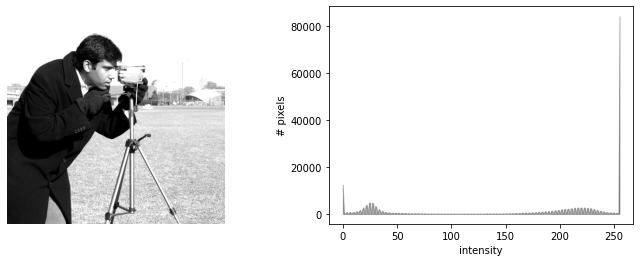

In [4]:
from skimage import exposure

high_contrast = exposure.rescale_intensity(camera, in_range=(10, 180))
skdemo.imshow_with_histogram(high_contrast)

(<AxesSubplot:>, <AxesSubplot:xlabel='intensity', ylabel='# pixels'>)

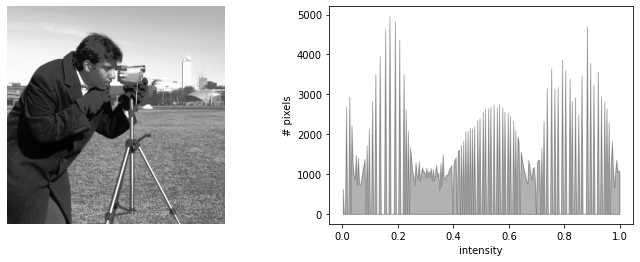

In [5]:
equalized = exposure.equalize_hist(camera)
skdemo.imshow_with_histogram(equalized)

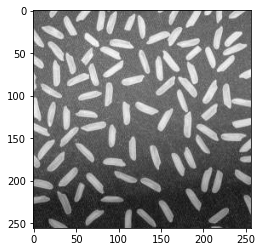

131


In [2]:
from skimage import filters

rice = io.imread('rice.jpg')
plt.imshow(rice)
plt.show()
otsu_thresh = filters.threshold_otsu(rice)
print(otsu_thresh)

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


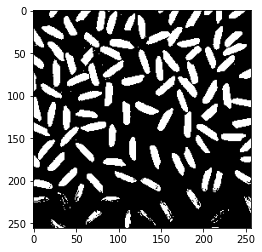

In [3]:
otsu_binary = rice > otsu_thresh
print(otsu_binary)
plt.imshow(otsu_binary, cmap='gray')
plt.show()

[[118.88112651 118.48013855 117.78903805 ... 122.41314402 119.87526513
  118.68680377]
 [118.65198368 118.28411832 117.65229547 ... 121.88864661 119.58889592
  118.51491196]
 [118.29727968 117.98697403 117.45803586 ... 121.01781072 119.13016121
  118.25435835]
 ...
 [ 71.67103176  71.62554558  71.5791105  ...  73.82410713  73.71757126
   73.60758698]
 [ 71.46355826  71.38370126  71.2830677  ...  73.69819372  73.49379271
   73.3224733 ]
 [ 71.36691302  71.26755336  71.13659385 ...  73.58851852  73.32897217
   73.12357418]]


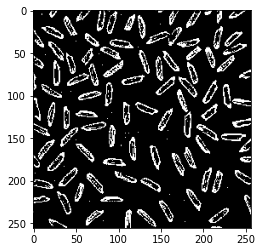

In [4]:
block_size = 17
local_thresh = filters.threshold_local(rice, block_size, offset=-20)
print(local_thresh)
local_binary = rice > local_thresh
plt.imshow(local_binary, cmap='gray')
plt.show()

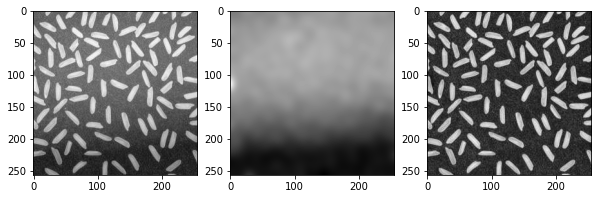

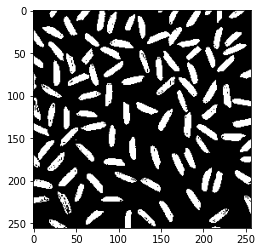

In [6]:
from skimage import morphology, img_as_float
img = img_as_float(rice)
bg = morphology.erosion(img, morphology.square(9))
bg = filters.gaussian(bg, sigma=7)
result = img - bg

plt.figure(figsize=(10,8))
plt.subplot(1, 3, 1)
plt.imshow(img, cmap="gray")
plt.subplot(1, 3, 2)
plt.imshow(bg, cmap="gray")
plt.subplot(1, 3, 3)
plt.imshow(result, cmap="gray")
plt.show()

front = result > 0.3
plt.imshow(front, cmap="gray")


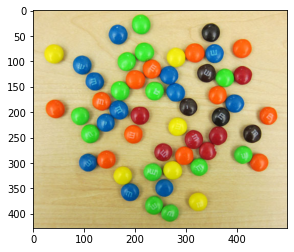

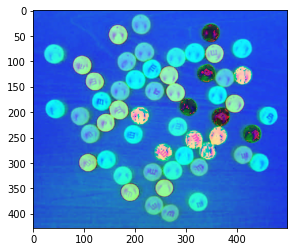

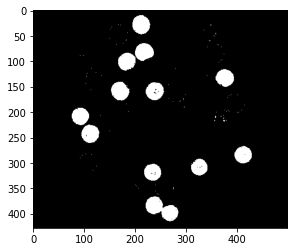

In [11]:
import numpy as np
from skimage.color import rgb2hsv

mm = io.imread("mm.jpg")
width = mm.shape[1]
height = mm.shape[0]
img = np.zeros((height,width))

plt.imshow(mm)
plt.show()

mm_hsv = rgb2hsv(mm)
plt.imshow(mm_hsv, cmap='hsv')
plt.show()

img[np.logical_and(mm_hsv[:, :, 0]>0.3, mm_hsv[:, :, 0]<0.37)] = 255

plt.imshow(img)
plt.show()